# Burnout & Lifestyle Balance AI
## Binary Classification with Manual Backpropagation

**Project Overview:**
This AI predicts burnout risk (0 = Healthy, 1 = Burnout) based on three lifestyle inputs:
- **Sleep Hours**: Hours of sleep per night
- **Work Hours**: Hours spent working/studying per day  
- **Relax Hours**: Hours spent relaxing (no screens, no work)

**Neural Network Architecture:**
- **Input Layer**: 3 neurons (sleep, work, relax - normalized to 0-1)
- **Hidden Layer**: 4 neurons (finds complex relationships)
- **Output Layer**: 1 neuron with Sigmoid activation (outputs 0.0-1.0)

This implementation uses **manual backpropagation** following multilayer perceptron theory with gradient descent.

## 1. Import Required Libraries
We'll use NumPy for matrix operations and Matplotlib for visualizations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
NumPy version: 2.4.0


## 2. Define Activation Functions
Implementing the **Sigmoid** activation function and its derivative for backpropagation.

**Sigmoid Formula:** $\sigma(x) = \frac{1}{1 + e^{-x}}$

**Derivative:** $\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$

In [2]:
def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of sigmoid for backpropagation"""
    return x * (1 - x)

# Test the functions
test_values = np.array([-2, -1, 0, 1, 2])
print("Sigmoid test:")
print(f"Input: {test_values}")
print(f"Output: {sigmoid(test_values)}")
print(f"\nSigmoid squashes values to range (0, 1)")

Sigmoid test:
Input: [-2 -1  0  1  2]
Output: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]

Sigmoid squashes values to range (0, 1)


## 3. Create Training Data
Creating realistic lifestyle patterns with corresponding burnout labels.

**Data Format:** `[sleep_hours/24, work_hours/24, relax_hours/24]` → Normalized to 0-1

**Burnout Logic:**
- **Healthy (0)**: Good sleep + moderate work + adequate relax
- **Burnout (1)**: Poor sleep + excessive work + no relax

In [3]:
# Training Data: [Sleep, Work, Relax] hours per day
# Each value normalized by dividing by 24 (max hours in a day)

raw_data = [
    # Healthy patterns (Target: 0)
    [8, 8, 4],      # Balanced lifestyle
    [9, 6, 5],      # Well-rested, light work
    [7, 7, 3],      # Decent balance
    [8, 9, 3],      # Productive but rested
    [7.5, 8, 4],    # Good balance
    
    # Burnout patterns (Target: 1)
    [4, 14, 0],     # Severe burnout - overworked
    [5, 13, 1],     # High burnout risk
    [4, 12, 0.5],   # Exhausted worker
    [3, 15, 0],     # Extreme burnout
    [5, 12, 0],     # Sleep deprived overworker
    
    # Borderline/Warning cases (Target: 1)
    [6, 10, 1],     # Warning - needs more rest
    [5.5, 11, 1.5], # High risk
    [6, 11, 0.5],   # Burnout building
]

# Normalize inputs (divide by 24 hours)
inputs = np.array([[sleep/24, work/24, relax/24] for sleep, work, relax in raw_data])

# Targets: 0 = Healthy, 1 = Burnout
targets = np.array([[0], [0], [0], [0], [0],  # Healthy
                    [1], [1], [1], [1], [1],  # Burnout
                    [1], [1], [1]])           # Warning/High Risk

print(f"Training samples: {len(inputs)}")
print(f"Input shape: {inputs.shape}")
print(f"Target shape: {targets.shape}")
print(f"\nSample data (first 3 rows):")
print(f"Inputs:\n{inputs[:3]}")
print(f"Targets:\n{targets[:3].T}")

Training samples: 13
Input shape: (13, 3)
Target shape: (13, 1)

Sample data (first 3 rows):
Inputs:
[[0.33333333 0.33333333 0.16666667]
 [0.375      0.25       0.20833333]
 [0.29166667 0.29166667 0.125     ]]
Targets:
[[0 0 0]]


## 4. Initialize Neural Network
Setting up the network architecture with random weights.

**Architecture:**
- Input → Hidden: 3×4 weight matrix (W1)
- Hidden → Output: 4×1 weight matrix (W2)
- Weights initialized randomly between -1 and 1

In [4]:
# Network configuration
input_size = 3      # Sleep, Work, Relax
hidden_size = 4     # Hidden neurons
output_size = 1     # Burnout probability (0-1)

# Initialize weights randomly between -1 and 1
W1 = np.random.uniform(-1, 1, (input_size, hidden_size))   # Input -> Hidden
W2 = np.random.uniform(-1, 1, (hidden_size, output_size))  # Hidden -> Output

# Training hyperparameters
learning_rate = 0.5
epochs = 20000

print("Neural Network Initialized!")
print(f"W1 shape (Input → Hidden): {W1.shape}")
print(f"W2 shape (Hidden → Output): {W2.shape}")
print(f"Learning rate: {learning_rate}")
print(f"Training epochs: {epochs:,}")

Neural Network Initialized!
W1 shape (Input → Hidden): (3, 4)
W2 shape (Hidden → Output): (4, 1)
Learning rate: 0.5
Training epochs: 20,000


## 5. Train the Neural Network (Backpropagation)
Implementing the complete training loop with feedforward and backpropagation.

**Steps per epoch:**
1. **Feedforward**: Input → Hidden → Output
2. **Calculate Error**: Target - Predicted
3. **Backpropagation**: Compute gradients using chain rule
4. **Update Weights**: Adjust W1 and W2 using gradient descent

In [5]:
# Track error over time for visualization
error_history = []

print("Training started...")
print("=" * 50)

for epoch in range(epochs):
    # ===== FEEDFORWARD (Alur Maju) =====
    # Layer 1: Input -> Hidden
    hidden_layer_input = np.dot(inputs, W1)
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    # Layer 2: Hidden -> Output
    output_layer_input = np.dot(hidden_layer_output, W2)
    predicted_output = sigmoid(output_layer_input)
    
    # ===== ERROR CALCULATION =====
    error = targets - predicted_output
    mean_squared_error = np.mean(error ** 2)
    error_history.append(mean_squared_error)
    
    # ===== BACKPROPAGATION (Alur Mundur) =====
    # Calculate gradients using chain rule
    # Output layer gradient
    d_predicted = error * sigmoid_derivative(predicted_output)
    
    # Hidden layer gradient
    error_hidden = d_predicted.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_layer_output)
    
    # ===== WEIGHT UPDATE (Gradient Descent) =====
    W2 += hidden_layer_output.T.dot(d_predicted) * learning_rate
    W1 += inputs.T.dot(d_hidden) * learning_rate
    
    # Print progress every 2000 epochs
    if (epoch + 1) % 2000 == 0:
        print(f"Epoch {epoch + 1:5d}/{epochs} | Error: {mean_squared_error:.6f}")

print("=" * 50)
print("✓ Training Complete!")
print(f"Final Error: {error_history[-1]:.6f}")

Training started...
Epoch  2000/20000 | Error: 0.000621
Epoch  4000/20000 | Error: 0.000258
Epoch  6000/20000 | Error: 0.000158
Epoch  8000/20000 | Error: 0.000112
Epoch 10000/20000 | Error: 0.000086
Epoch 12000/20000 | Error: 0.000069
Epoch 14000/20000 | Error: 0.000058
Epoch 16000/20000 | Error: 0.000049
Epoch 18000/20000 | Error: 0.000043
Epoch 20000/20000 | Error: 0.000038
✓ Training Complete!
Final Error: 0.000038


## 6. Visualize Training Progress
Plotting the error/loss curve to see how the model learned over time.

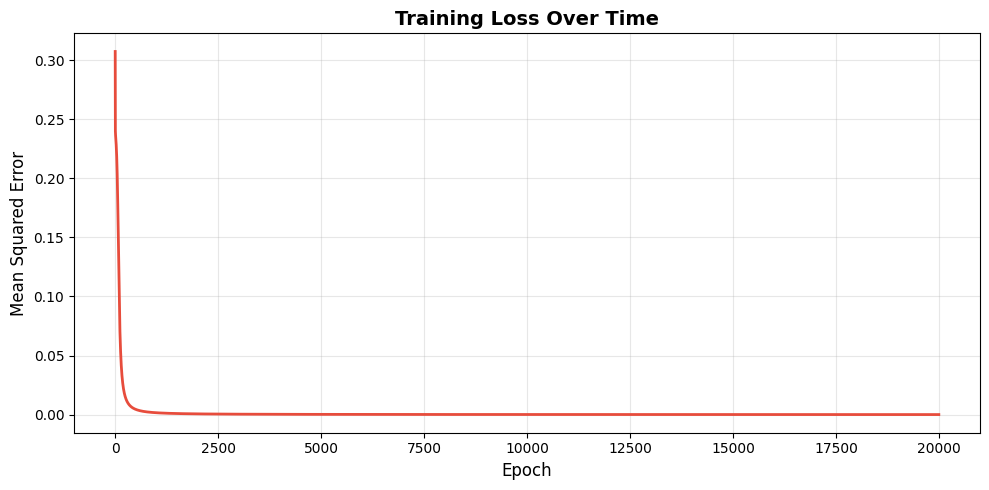

Error decreased from 0.307307 to 0.000038
Improvement: 99.99%


In [6]:
plt.figure(figsize=(10, 5))
plt.plot(error_history, linewidth=2, color='#e74c3c')
plt.title('Training Loss Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Error decreased from {error_history[0]:.6f} to {error_history[-1]:.6f}")
print(f"Improvement: {((error_history[0] - error_history[-1]) / error_history[0] * 100):.2f}%")

## 7. Test the Model
Evaluating the trained model on the training data and new test cases.

In [7]:
# Test on training data
hidden_output = sigmoid(np.dot(inputs, W1))
predictions = sigmoid(np.dot(hidden_output, W2))

print("=" * 70)
print("PREDICTIONS ON TRAINING DATA")
print("=" * 70)
print(f"{'Sleep':>5} {'Work':>5} {'Relax':>5} | {'Predicted':>10} | {'Target':>6} | {'Status':>10}")
print("-" * 70)

for i, (inp, pred, target) in enumerate(zip(raw_data, predictions, targets)):
    sleep, work, relax = inp
    prob = pred[0] * 100
    actual = target[0]
    status = "✓ Correct" if (prob < 50 and actual == 0) or (prob >= 50 and actual == 1) else "✗ Wrong"
    print(f"{sleep:5.1f} {work:5.1f} {relax:5.1f} | {prob:9.2f}% | {actual:6.0f} | {status:>10}")

print("=" * 70)

PREDICTIONS ON TRAINING DATA
Sleep  Work Relax |  Predicted | Target |     Status
----------------------------------------------------------------------
  8.0   8.0   4.0 |      0.09% |      0 |  ✓ Correct
  9.0   6.0   5.0 |      0.00% |      0 |  ✓ Correct
  7.0   7.0   3.0 |      0.35% |      0 |  ✓ Correct
  8.0   9.0   3.0 |      1.50% |      0 |  ✓ Correct
  7.5   8.0   4.0 |      0.18% |      0 |  ✓ Correct
  4.0  14.0   0.0 |    100.00% |      1 |  ✓ Correct
  5.0  13.0   1.0 |     99.99% |      1 |  ✓ Correct
  4.0  12.0   0.5 |     99.99% |      1 |  ✓ Correct
  3.0  15.0   0.0 |    100.00% |      1 |  ✓ Correct
  5.0  12.0   0.0 |     99.99% |      1 |  ✓ Correct
  6.0  10.0   1.0 |     98.45% |      1 |  ✓ Correct
  5.5  11.0   1.5 |     99.65% |      1 |  ✓ Correct
  6.0  11.0   0.5 |     99.81% |      1 |  ✓ Correct


### Test with New Data
Let's test the model with new lifestyle patterns it hasn't seen during training.

In [8]:
# Test cases: [Sleep, Work, Relax]
test_cases = [
    [7, 9, 2, "Moderate worker"],
    [5, 12, 1, "Overworked person"],
    [8.5, 7, 4, "Well-balanced individual"],
    [4, 15, 0, "Extreme burnout case"],
    [6, 6, 4, "Relaxed lifestyle"]
]

print("\n" + "=" * 70)
print("PREDICTIONS ON NEW TEST DATA")
print("=" * 70)
print(f"{'Sleep':>5} {'Work':>5} {'Relax':>5} | {'Burnout Risk':>12} | {'Assessment':<20}")
print("-" * 70)

for sleep, work, relax, description in test_cases:
    # Normalize inputs
    test_input = np.array([[sleep/24, work/24, relax/24]])
    
    # Feedforward prediction
    h_out = sigmoid(np.dot(test_input, W1))
    result = sigmoid(np.dot(h_out, W2))
    prob = result[0][0] * 100
    
    # Risk assessment
    if prob < 30:
        assessment = "🟢 Healthy"
    elif prob < 70:
        assessment = "🟡 Warning"
    else:
        assessment = "🔴 High Burnout Risk"
    
    print(f"{sleep:5.1f} {work:5.1f} {relax:5.1f} | {prob:11.2f}% | {assessment:<20} ({description})")

print("=" * 70)


PREDICTIONS ON NEW TEST DATA
Sleep  Work Relax | Burnout Risk | Assessment          
----------------------------------------------------------------------
  7.0   9.0   2.0 |       29.80% | 🟢 Healthy            (Moderate worker)
  5.0  12.0   1.0 |       99.97% | 🔴 High Burnout Risk  (Overworked person)
  8.5   7.0   4.0 |        0.02% | 🟢 Healthy            (Well-balanced individual)
  4.0  15.0   0.0 |      100.00% | 🔴 High Burnout Risk  (Extreme burnout case)
  6.0   6.0   4.0 |        0.09% | 🟢 Healthy            (Relaxed lifestyle)


## 8. Interactive Prediction Tool
Enter your own lifestyle data to check your burnout risk!

In [9]:
def predict_burnout(sleep_hours, work_hours, relax_hours):
    """
    Predict burnout risk based on lifestyle inputs
    
    Parameters:
    - sleep_hours: Hours of sleep per night (0-12)
    - work_hours: Hours of work/study per day (0-16)
    - relax_hours: Hours of pure relaxation per day (0-8)
    
    Returns:
    - Burnout probability (0-100%)
    - Health recommendation
    """
    # Normalize inputs
    user_input = np.array([[sleep_hours/24, work_hours/24, relax_hours/24]])
    
    # Feedforward prediction
    hidden = sigmoid(np.dot(user_input, W1))
    output = sigmoid(np.dot(hidden, W2))
    probability = output[0][0] * 100
    
    # Generate recommendation
    print("\n" + "=" * 60)
    print("🧠 BURNOUT RISK ANALYSIS")
    print("=" * 60)
    print(f"Sleep:  {sleep_hours} hours/night")
    print(f"Work:   {work_hours} hours/day")
    print(f"Relax:  {relax_hours} hours/day")
    print("-" * 60)
    print(f"Burnout Risk Score: {probability:.1f}%")
    print("-" * 60)
    
    if probability < 30:
        status = "🟢 HEALTHY - Low Burnout Risk"
        advice = "Great job! Your lifestyle is well-balanced. Keep it up!"
    elif probability < 50:
        status = "🟡 CAUTION - Moderate Risk"
        advice = "Warning signs detected. Consider increasing sleep or reducing work hours."
    elif probability < 70:
        status = "🟠 WARNING - High Risk"
        advice = "You're at risk of burnout. Prioritize rest and relaxation immediately."
    else:
        status = "🔴 DANGER - Severe Burnout Risk"
        advice = "Critical! You need to make major lifestyle changes. Seek support if needed."
    
    print(f"Status: {status}")
    print(f"Advice: {advice}")
    print("=" * 60)
    
    return probability

# Example usage - Modify these values to test your own lifestyle!
my_sleep = 6      # Change this
my_work = 10      # Change this
my_relax = 2      # Change this

predict_burnout(my_sleep, my_work, my_relax)


🧠 BURNOUT RISK ANALYSIS
Sleep:  6 hours/night
Work:   10 hours/day
Relax:  2 hours/day
------------------------------------------------------------
Burnout Risk Score: 92.9%
------------------------------------------------------------
Status: 🔴 DANGER - Severe Burnout Risk
Advice: Critical! You need to make major lifestyle changes. Seek support if needed.


np.float64(92.92191620587037)

## 9. Save the Trained Model
Saving the trained weights so we can use them in production (FastAPI).

In [10]:
import os

# Save weights to models directory
model_path = os.path.join('..', 'models', 'burnout_weights.npz')
np.savez(model_path, W1=W1, W2=W2)

print(f"✓ Model saved to: {model_path}")
print(f"  - W1 shape: {W1.shape}")
print(f"  - W2 shape: {W2.shape}")
print("\nThese weights can now be loaded in the FastAPI backend for predictions!")

✓ Model saved to: ..\models\burnout_weights.npz
  - W1 shape: (3, 4)
  - W2 shape: (4, 1)

These weights can now be loaded in the FastAPI backend for predictions!
